In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c plant-pathology-2020-fgvc7


  0% 0.00/170k [00:00<?, ?B/s]
100% 170k/170k [00:00<00:00, 64.9MB/s]
  0% 0.00/238k [00:00<?, ?B/s]
100% 238k/238k [00:00<00:00, 76.7MB/s]
  0% 0.00/204k [00:00<?, ?B/s]
100% 204k/204k [00:00<00:00, 57.5MB/s]
  0% 0.00/275k [00:00<?, ?B/s]
100% 275k/275k [00:00<00:00, 82.5MB/s]
  0% 0.00/213k [00:00<?, ?B/s]
100% 213k/213k [00:00<00:00, 68.2MB/s]
  0% 0.00/232k [00:00<?, ?B/s]
100% 232k/232k [00:00<00:00, 70.0MB/s]
  0% 0.00/283k [00:00<?, ?B/s]
100% 283k/283k [00:00<00:00, 81.7MB/s]
  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 66.7MB/s]
  0% 0.00/226k [00:00<?, ?B/s]
100% 226k/226k [00:00<00:00, 68.1MB/s]
  0% 0.00/245k [00:00<?, ?B/s]
100% 245k/245k [00:00<00:00, 73.4MB/s]
  0% 0.00/214k [00:00<?, ?B/s]
100% 214k/214k [00:00<00:00, 66.9MB/s]
  0% 0.00/294k [00:00<?, ?B/s]
100% 294k/294k [00:00<00:00, 93.0MB/s]
  0% 0.00/218k [00:00<?, ?B/s]
100% 218k/218k [00:00<00:00, 69.4MB/s]
  0% 0.00/180k [00:00<?, ?B/s]
100% 180k/180k [00:00<00:00, 179MB/s]
  0% 0.00/174k [00:00

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
df = pd.read_csv('/content/train.csv')
df

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [0]:
from tensorflow.keras.preprocessing import image
X = []
width = 80
height = 80
for i in range(df.shape[0]):
  path = '/content/drive/My Drive/images/'+df['image_id'][i]+'.jpg'
  img=image.load_img(path,target_size=(width,height,3))  
  img=image.img_to_array(img)
  img=img/255.0
  X.append(img)


In [0]:
X[0],len(X)

(array([[[0.13333334, 0.20392157, 0.05490196],
         [0.15294118, 0.22352941, 0.05882353],
         [0.1764706 , 0.24705882, 0.08235294],
         ...,
         [0.14901961, 0.21176471, 0.06666667],
         [0.18039216, 0.21568628, 0.10196079],
         [0.19607843, 0.23529412, 0.10196079]],
 
        [[0.12941177, 0.2       , 0.05098039],
         [0.14509805, 0.21568628, 0.05098039],
         [0.15686275, 0.23921569, 0.07058824],
         ...,
         [0.18039216, 0.21960784, 0.11372549],
         [0.14117648, 0.2       , 0.08627451],
         [0.16078432, 0.22352941, 0.08235294]],
 
        [[0.15686275, 0.24313726, 0.0627451 ],
         [0.13725491, 0.21960784, 0.05882353],
         [0.14117648, 0.22352941, 0.0627451 ],
         ...,
         [0.14117648, 0.20784314, 0.07450981],
         [0.1254902 , 0.20392157, 0.05882353],
         [0.14901961, 0.23137255, 0.0627451 ]],
 
        ...,
 
        [[0.7058824 , 0.7058824 , 0.42352942],
         [0.7058824 , 0.68235296, 0.45490

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
y = df.drop('image_id',axis=1)
y = y.to_numpy()

X=np.array(X)
y.shape

(1821, 4)

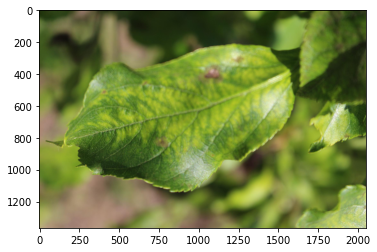

In [0]:
from PIL import Image as PImage

img = PImage.open('/content/drive/My Drive/images/'+df['image_id'][0]+'.jpg')
plt.imshow(img)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
print(X.shape,y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)


(1821, 80, 80, 3) (1821, 4)


In [0]:

len(X_train),len(y_train),len(X_test),len(y_test)


(1547, 1547, 274, 274)

In [0]:
model = tf.keras.models.Sequential([
   
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=X_train[0].shape),

    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Flatten(), 
  
    tf.keras.layers.Dense(1028, activation='relu'), 
  
    tf.keras.layers.Dense(4, activation='sigmoid')  
])
model.summary()


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 6, 6, 32)        

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



In [0]:
history = model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test))


Epoch 1/25
49/49 [==============================] - 2s 38ms/step - loss: 0.5315 - accuracy: 0.3264 - val_loss: 0.5195 - val_accuracy: 0.3212
Epoch 2/25
49/49 [==============================] - 2s 36ms/step - loss: 0.5163 - accuracy: 0.3432 - val_loss: 0.5222 - val_accuracy: 0.3577
Epoch 3/25
49/49 [==============================] - 2s 34ms/step - loss: 0.5106 - accuracy: 0.3762 - val_loss: 0.5227 - val_accuracy: 0.3942
Epoch 4/25
49/49 [==============================] - 2s 34ms/step - loss: 0.4996 - accuracy: 0.4402 - val_loss: 0.5053 - val_accuracy: 0.4599
Epoch 5/25
49/49 [==============================] - 2s 34ms/step - loss: 0.4854 - accuracy: 0.4764 - val_loss: 0.4856 - val_accuracy: 0.5146
Epoch 6/25
49/49 [==============================] - 2s 35ms/step - loss: 0.4665 - accuracy: 0.5229 - val_loss: 0.4677 - val_accuracy: 0.5292
Epoch 7/25
49/49 [==============================] - 2s 34ms/step - loss: 0.4438 - accuracy: 0.5553 - val_loss: 0.4489 - val_accuracy: 0.5511
Epoch 8/25
49

<Figure size 432x288 with 0 Axes>

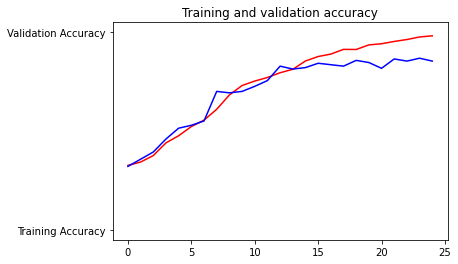

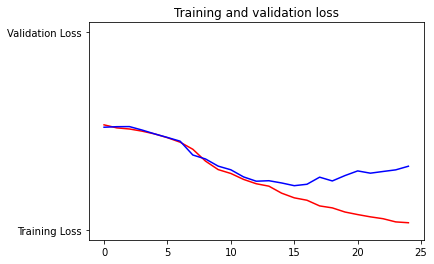

<Figure size 432x288 with 0 Axes>

In [0]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')
plt.figure()

In [0]:
df1 = pd.read_csv('/content/test.csv')
df1

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


In [0]:
test = []
width = 80
height = 80
for i in range(df1.shape[0]):
  data=[]
  path = '/content/drive/My Drive/images/'+df1['image_id'][i]+'.jpg'
  img=image.load_img(path,target_size=(width,height,3))  
  img=image.img_to_array(img)
  data.append(df1['image_id'][i])
  img=img/255.0
  img = img.reshape(1,width,height,3)  
  y_t=model.predict(img)
  for y in np.nditer(y_t):
    data.append(y)

  test.append(data)


In [0]:
test[0]

['Test_0',
 array(1.1559785e-11, dtype=float32),
 array(0.00062781, dtype=float32),
 array(0.9997272, dtype=float32),
 array(4.113156e-05, dtype=float32)]

In [0]:
print(type(test))
df2 = pd.DataFrame(test, 
               columns =['image_id', 'healthy','multiple_diseases','rust','scab'])
df2 

<class 'list'>


,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,1.1559785e-11,0.00062780676,0.9997272,4.113156e-05
1,Test_1,9.743636e-09,9.341834e-06,0.99999857,1.8248886e-05
2,Test_2,0.012134697,0.0014371702,4.0832592e-06,0.9886312
3,Test_3,0.40990728,0.008893381,0.00074120105,0.63586056
4,Test_4,1.7541265e-20,0.096150406,0.9268239,1.5103842e-13
...,...,...,...,...,...
1816,Test_1816,2.0420586e-12,0.30318412,0.9991277,2.904912e-10
1817,Test_1817,3.1698066e-05,0.45557418,0.0046929657,0.85194284
1818,Test_1818,0.0001186756,0.045795638,0.97877306,6.46511e-05
1819,Test_1819,0.9751466,0.001937542,0.00041463933,0.03184504


In [0]:
df2.to_csv('submission.csv', index = False)